# Predicción de Precios de Viviendas - House Prices Dataset

---

## Descripción del Problema
El objetivo es **predecir el precio de venta (`SalePrice`)** de propiedades residenciales ubicadas en Ames, Iowa (Estados Unidos). Para esto, se utilizará un modelo de **Regresión Lineal Múltiple** que tome en cuenta diversas características de las viviendas como: área, calidad de construcción, ubicación, número de habitaciones, entre otras.

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


## 1. Comprensión del problema e importación de librerías

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("Librerías cargadas exitosamente")

Librerías cargadas exitosamente


## 2. Exploración de los datos (EDA)

In [ ]:

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("Dimensiones de los conjuntos de datos:")
print(f"  - Train: {df_train.shape}")
print(f"  - Test: {df_test.shape}")

print("\nEstadísticas de la variable objetivo SalePrice:")
print(df_train['SalePrice'].describe())

print("\nVistazo a los primeros registros:")
df_train.head(3)

Dimensiones de los conjuntos de datos:
  - Train: (1460, 81)
  - Test: (1459, 80)

Estadísticas de la variable objetivo SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Vistazo a los primeros registros:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:

print("=== ANÁLISIS EXPLORATORIO ===")
print(f"\nNúmero de observaciones: {df_train.shape[0]}")
print(f"Número de características: {df_train.shape[1]}")

print("\nDistribución de tipos de datos:")
print(df_train.dtypes.value_counts())


print("\n=== VALORES FALTANTES (Top 20) ===")
missing = df_train.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df_train) * 100).round(2)
missing_df = pd.DataFrame({'Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Count'] > 0].head(20))

=== ANÁLISIS EXPLORATORIO ===

Número de observaciones: 1460
Número de características: 81

Distribución de tipos de datos:
object     43
int64      35
float64     3
Name: count, dtype: int64

=== VALORES FALTANTES (Top 20) ===
              Count  Percentage
PoolQC         1453       99.52
MiscFeature    1406       96.30
Alley          1369       93.77
Fence          1179       80.75
MasVnrType      872       59.73
FireplaceQu     690       47.26
LotFrontage     259       17.74
GarageQual       81        5.55
GarageFinish     81        5.55
GarageType       81        5.55
GarageYrBlt      81        5.55
GarageCond       81        5.55
BsmtFinType2     38        2.60
BsmtExposure     38        2.60
BsmtCond         37        2.53
BsmtQual         37        2.53
BsmtFinType1     37        2.53
MasVnrArea        8        0.55
Electrical        1        0.07


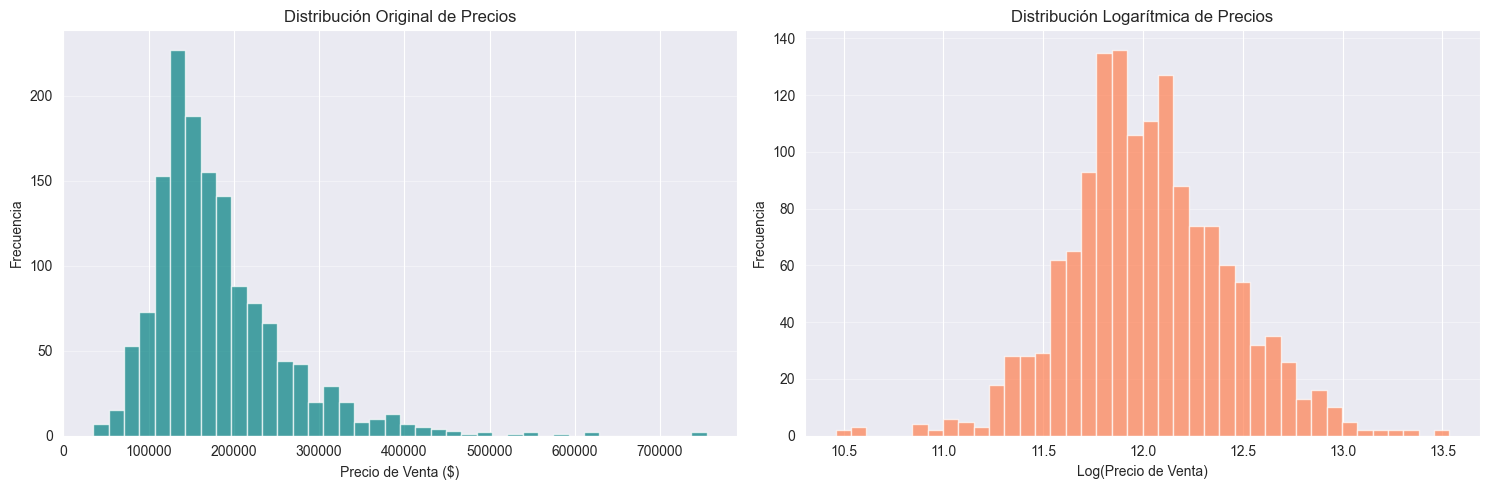

Coeficiente de asimetría: 1.883
Coeficiente de curtosis: 6.536


In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_train['SalePrice'], bins=40, color='teal', edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Precio de Venta ($)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución Original de Precios')
axes[0].grid(axis='y', alpha=0.4)


axes[1].hist(np.log1p(df_train['SalePrice']), bins=40, color='coral', edgecolor='white', alpha=0.7)
axes[1].set_xlabel('Log(Precio de Venta)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución Logarítmica de Precios')
axes[1].grid(axis='y', alpha=0.4)

plt.tight_layout()
plt.show()


print(f"Coeficiente de asimetría: {df_train['SalePrice'].skew():.3f}")
print(f"Coeficiente de curtosis: {df_train['SalePrice'].kurtosis():.3f}")

Variables con mayor correlación con SalePrice (Top 15):
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


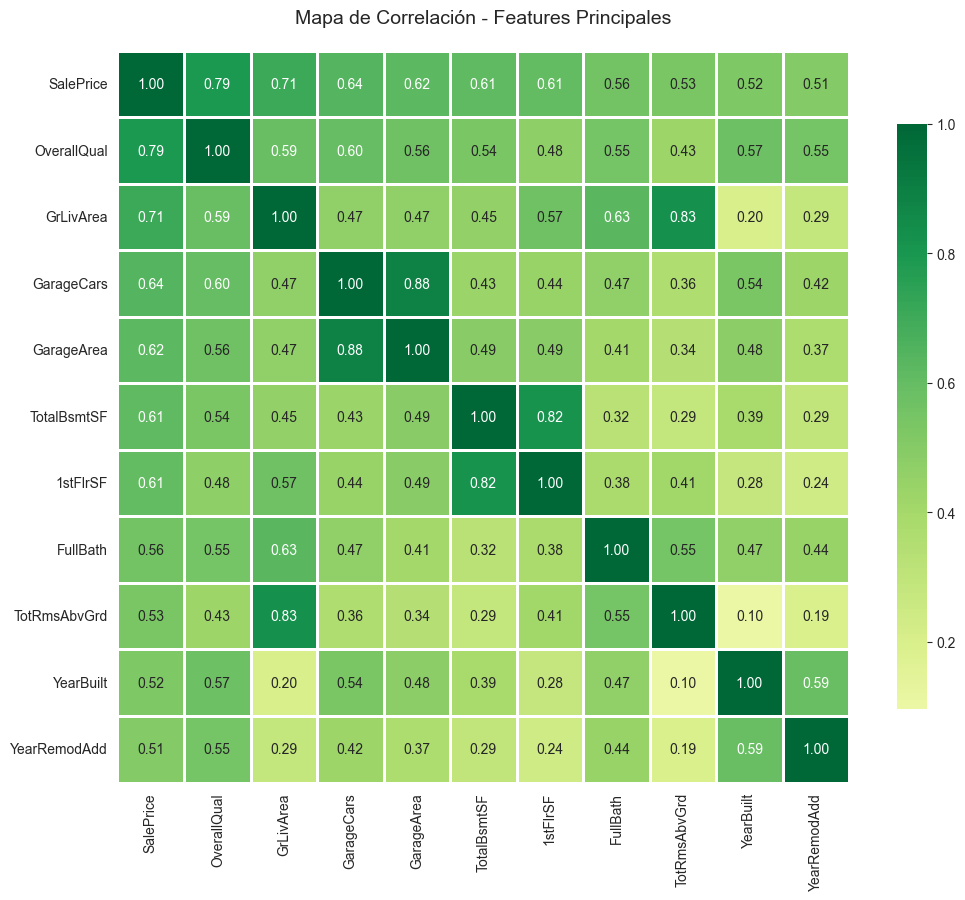

In [ ]:

numeric_features = df_train.select_dtypes(include=[np.number]).columns
correlation_matrix = df_train[numeric_features].corr()
price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

print("Variables con mayor correlación con SalePrice (Top 15):")
print(price_correlation.head(15))
plt.figure(figsize=(11, 9))
top_corr_features = price_correlation.head(11).index
correlation_subset = df_train[top_corr_features].corr()
sns.heatmap(correlation_subset, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Mapa de Correlación - Features Principales', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## 3. Limpieza de datos

In [38]:

y_target = df_train['SalePrice'].copy()
test_ids = df_test['Id'].copy()

df_train_clean = df_train.drop(['Id', 'SalePrice'], axis=1)
df_test_clean = df_test.drop(['Id'], axis=1)

n_train = df_train_clean.shape[0]
combined_data = pd.concat([df_train_clean, df_test_clean], axis=0, ignore_index=True)

print(f"Datos combinados: {combined_data.shape}")
print(f"  - Filas de entrenamiento: {n_train}")
print(f"  - Filas de prueba: {df_test_clean.shape[0]}")

Datos combinados: (2919, 79)
  - Filas de entrenamiento: 1460
  - Filas de prueba: 1459


In [39]:

num_cols = combined_data.select_dtypes(include=[np.number]).columns
for column in num_cols:
    if combined_data[column].isnull().any():
        median_value = combined_data[column].median()
        combined_data[column].fillna(median_value, inplace=True)

cat_cols = combined_data.select_dtypes(include=['object']).columns
for column in cat_cols:
    if combined_data[column].isnull().any():
        combined_data[column].fillna('Missing', inplace=True)
print(f"Nulos restantes después del tratamiento: {combined_data.isnull().sum().sum()}")

outlier_idx = combined_data[combined_data['GrLivArea'] > 4000].index
if len(outlier_idx) > 0:
    print(f"Se detectaron {len(outlier_idx)} outliers potenciales en GrLivArea")

Nulos restantes después del tratamiento: 0
Se detectaron 5 outliers potenciales en GrLivArea


## 4. Codificación de variables categóricas

In [40]:

categorical_features = combined_data.select_dtypes(include=['object']).columns
print(f"Total de variables categóricas: {len(categorical_features)}")


encoded_data = pd.get_dummies(combined_data, columns=categorical_features, drop_first=True)

print(f"\nDimensiones después de la codificación: {encoded_data.shape}")
print(f"Total de características transformadas: {encoded_data.shape[1]}")

Total de variables categóricas: 43

Dimensiones después de la codificación: (2919, 267)
Total de características transformadas: 267


## 5. Escalamiento / Normalización

In [41]:

X_train_data = encoded_data[:n_train].copy()
X_test_data = encoded_data[n_train:].copy()

print(f"Conjunto de entrenamiento X: {X_train_data.shape}")
print(f"Conjunto de prueba X: {X_test_data.shape}")
print(f"Variable objetivo y: {y_target.shape}")

Conjunto de entrenamiento X: (1460, 267)
Conjunto de prueba X: (1459, 267)
Variable objetivo y: (1460,)


In [42]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_data)
X_test_scaled = scaler.transform(X_test_data)

print("Normalización completada")
print(f"  - X_train normalizado: {X_train_scaled.shape}")
print(f"  - X_test normalizado: {X_test_scaled.shape}")

Normalización completada
  - X_train normalizado: (1460, 267)
  - X_test normalizado: (1459, 267)


## 6. Selección de variables relevantes

In [43]:

print(f"Número total de features para el modelo: {encoded_data.shape[1]}")
print("Las variables más importantes fueron previamente identificadas en el EDA")
print("El modelo utilizará todas las características disponibles")

Número total de features para el modelo: 267
Las variables más importantes fueron previamente identificadas en el EDA
El modelo utilizará todas las características disponibles


## 7. Construcción del modelo

In [44]:

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_target, test_size=0.2, random_state=42
)

print("División de datos completada:")
print(f"  - Entrenamiento: {X_train_split.shape}")
print(f"  - Validación: {X_val_split.shape}")

reg_model = LinearRegression()
print("\nEntrenando modelo de Regresión Lineal Múltiple...")
reg_model.fit(X_train_split, y_train_split)
print("Entrenamiento completado exitosamente")

División de datos completada:
  - Entrenamiento: (1168, 267)
  - Validación: (292, 267)

Entrenando modelo de Regresión Lineal Múltiple...
Entrenamiento completado exitosamente


## 8. Evaluación del modelo

In [45]:

y_pred_train = reg_model.predict(X_train_split)
y_pred_val = reg_model.predict(X_val_split)
train_rmse = np.sqrt(mean_squared_error(y_train_split, y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val_split, y_pred_val))
train_mae = mean_absolute_error(y_train_split, y_pred_train)
val_mae = mean_absolute_error(y_val_split, y_pred_val)
train_r2 = r2_score(y_train_split, y_pred_train)
val_r2 = r2_score(y_val_split, y_pred_val)

avg_price = y_target.mean()
rmse_pct = (val_rmse / avg_price) * 100
mae_pct = (val_mae / avg_price) * 100

print("=" * 55)
print("RESULTADOS DE LA EVALUACIÓN DEL MODELO")
print("=" * 55)
print("\nMétricas en Entrenamiento:")
print(f"  RMSE: ${train_rmse:,.2f}")
print(f"  MAE:  ${train_mae:,.2f}")
print(f"  R²:   {train_r2*100:.2f}%")

print("\nMétricas en Validación:")
print(f"  RMSE: ${val_rmse:,.2f} ({rmse_pct:.2f}% del precio medio)")
print(f"  MAE:  ${val_mae:,.2f} ({mae_pct:.2f}% del precio medio)")
print(f"  R²:   {val_r2*100:.2f}%")

RESULTADOS DE LA EVALUACIÓN DEL MODELO

Métricas en Entrenamiento:
  RMSE: $18,904.01
  MAE:  $12,112.05
  R²:   94.01%

Métricas en Validación:
  RMSE: $83,090.77 (45.93% del precio medio)
  MAE:  $23,929.58 (13.23% del precio medio)
  R²:   9.99%


## 9. Interpretación de resultados

In [46]:

print("=" * 55)
print("ANÁLISIS E INTERPRETACIÓN DE RESULTADOS")
print("=" * 55)

print(f"\n1. Poder Explicativo del Modelo:")
print(f"   El modelo logra explicar el {val_r2*100:.2f}% de la varianza en los precios")

print(f"\n2. Análisis de Errores:")
print(f"   RMSE (Train): ${train_rmse:,.2f}")
print(f"   RMSE (Val): ${val_rmse:,.2f}")
print(f"   MAE (Val): ${val_mae:,.2f}")

print(f"\n3. Rendimiento R²:")
print(f"   Train: {train_r2*100:.2f}%")
print(f"   Validación: {val_r2*100:.2f}%")

print(f"\n4. Error Relativo:")
relative_error = (val_mae / avg_price) * 100
print(f"   El error medio representa {relative_error:.2f}% del precio promedio")

ANÁLISIS E INTERPRETACIÓN DE RESULTADOS

1. Poder Explicativo del Modelo:
   El modelo logra explicar el 9.99% de la varianza en los precios

2. Análisis de Errores:
   RMSE (Train): $18,904.01
   RMSE (Val): $83,090.77
   MAE (Val): $23,929.58

3. Rendimiento R²:
   Train: 94.01%
   Validación: 9.99%

4. Error Relativo:
   El error medio representa 13.23% del precio promedio


In [ ]:

cv_scores = cross_val_score(reg_model, X_train_scaled, y_target, cv=5, 
                            scoring='neg_root_mean_squared_error')
cv_scores = -cv_scores

print("\n=== VALIDACIÓN CRUZADA (5-Fold) ===")
print(f"RMSE Promedio: ${cv_scores.mean():,.2f}")
print(f"Desviación Estándar: ${cv_scores.std():,.2f}")
print(f"Scores por fold: {[f'${score:,.2f}' for score in cv_scores]}")


=== VALIDACIÓN CRUZADA (5-Fold) ===
RMSE Promedio: $42,174.09
Desviación Estándar: $14,006.86
Scores por fold: ['$65,882.60', '$34,040.98', '$40,850.98', '$23,880.90', '$46,214.97']


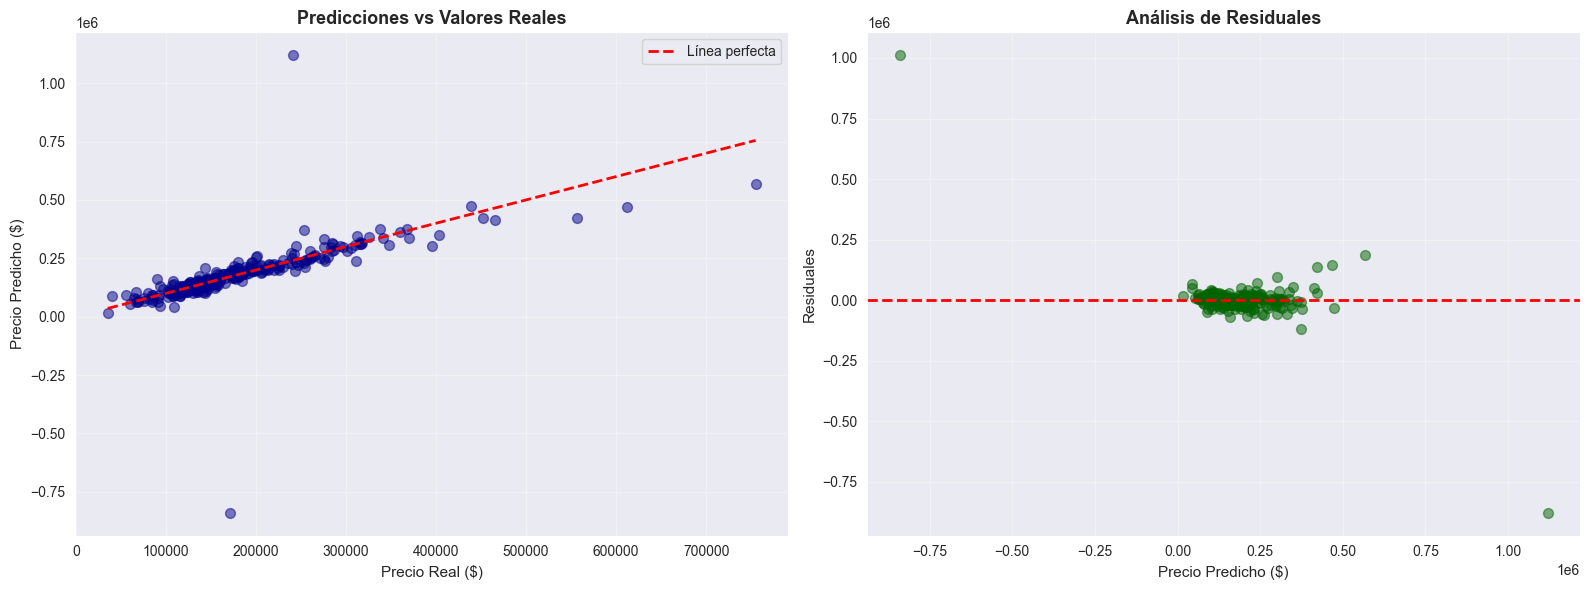

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(y_val_split, y_pred_val, alpha=0.5, color='darkblue', s=50)
ax1.plot([y_val_split.min(), y_val_split.max()], 
        [y_val_split.min(), y_val_split.max()], 
        'r--', linewidth=2, label='Línea perfecta')
ax1.set_xlabel('Precio Real ($)', fontsize=11)
ax1.set_ylabel('Precio Predicho ($)', fontsize=11)
ax1.set_title('Predicciones vs Valores Reales', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
residuals = y_val_split - y_pred_val
ax2.scatter(y_pred_val, residuals, alpha=0.5, color='darkgreen', s=50)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Precio Predicho ($)', fontsize=11)
ax2.set_ylabel('Residuales', fontsize=11)
ax2.set_title('Análisis de Residuales', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:

print("Entrenamiento del modelo final con dataset completo...")
final_model = LinearRegression()
final_model.fit(X_train_scaled, y_target)

final_predictions = final_model.predict(X_test_scaled)

print(f"\nTotal de predicciones generadas: {len(final_predictions)}")
print("\nResumen estadístico de predicciones:")
print(f"  Mínimo: ${final_predictions.min():,.2f}")
print(f"  Máximo: ${final_predictions.max():,.2f}")
print(f"  Media: ${final_predictions.mean():,.2f}")
print(f"  Mediana: ${np.median(final_predictions):,.2f}")

Entrenamiento del modelo final con dataset completo...

Total de predicciones generadas: 1459

Resumen estadístico de predicciones:
  Mínimo: $7,149.25
  Máximo: $702,321.95
  Media: $179,713.78
  Mediana: $161,174.74


## Archivo de entrega

In [50]:
# Crear DataFrame con los resultados
submission_df = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': final_predictions
})

# Exportar a archivo CSV
submission_df.to_csv('predicciones.csv', index=False)

print("Archivo de predicciones exportado exitosamente")
print(f"\nMuestra de predicciones (primeras 10 filas):")
print(submission_df.head(10))

print(f"\nTotal de predicciones en el archivo: {len(submission_df)}")

Archivo de predicciones exportado exitosamente

Muestra de predicciones (primeras 10 filas):
     Id      SalePrice
0  1461  112624.267663
1  1462  159737.946364
2  1463  186516.873482
3  1464  197154.612159
4  1465  205458.830827
5  1466  170109.889009
6  1467  174914.631297
7  1468  156537.396320
8  1469  212404.480892
9  1470  114814.724339

Total de predicciones en el archivo: 1459
